In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [35]:
credit_card = pd.read_csv('creditcard.csv')

In [36]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
X = credit_card.drop(['Class'], axis =1)
y = credit_card['Class']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 14)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [11]:
!pip install -U imbalanced-learn

In [43]:
from imblearn.over_sampling import ADASYN

In [44]:
from imblearn.under_sampling import RandomUnderSampler

In [45]:
from collections import Counter

In [ ]:
#Wayne said that undersampling is the best way to deal with this imbalanced data set

In [46]:
und_sam = RandomUnderSampler(random_state = 14)

In [47]:
#Resampling the data
X_train_unsam, y_train_unsam = und_sam.fit_resample(X_train, y_train)

In [48]:
print(Counter(y_train_unsam))

Counter({0: 377, 1: 377})


In [74]:
#Initiating a grid search for our resampled data 
lr_unsam = LogisticRegression()
params_lr_unsam = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 3000]}
kfold_lr_unsam = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 2, random_state = 14)
lr_ada_cv = GridSearchCV(lr_unsam, 
                           param_grid = params_lr_unsam, 
                          scoring = 'roc_auc',
                          cv = kfold_lr_unsam,
                          return_train_score = True)

In [75]:
#Fitting our grid search to our new resampled data. 
lr_unsam_cv.fit(X_train_unsam, y_train_unsam)

/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

GridSearchCV(cv=KFold(n_splits=10, random_state=14, shuffle=True),
             estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               3000]},
             return_train_score=True, scoring='roc_auc')

In [76]:
print(lr_unsam_cv.best_score_)

0.9804382563347946


In [77]:
print(lr_unsam_cv.best_params_)

{'C': 0.01}


In [94]:
#Initiating a second LogisticRegression() GridSearch() with a higher max_iter
lr_unsam2 = LogisticRegression(max_iter = 1000)
params_lr_unsam2 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 3000]}
kfold_lr_unsam2 = KFold(n_splits = 10, shuffle = True, random_state = 14)
lr_unsam_cv2 = GridSearchCV(lr_unsam2, 
                           param_grid = params_lr_unsam2, 
                          scoring = 'roc_auc',
                          cv = kfold_lr_unsam2,
                          return_train_score = True)

In [95]:
lr_unsam_cv2.fit(X_train_unsam, y_train_unsam)

GridSearchCV(cv=KFold(n_splits=10, random_state=14, shuffle=True),
             estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               3000]},
             return_train_score=True, scoring='roc_auc')

In [96]:
print(lr_unsam_cv2.best_score_)

0.9804382563347946


In [97]:
print(lr_unsam_cv2.best_params_)

{'C': 0.01}


In [86]:
#Initiating it one more time with max_iter as a parameter in the grid search
lr_unsam3 = LogisticRegression()
params_lr_unsam3 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 3000],
                   'max_iter': [100, 250, 500, 1000, 2000]}
kfold_lr_unsam3 = KFold(n_splits = 5, shuffle = True, random_state = 14)
lr_unsam_cv3 = GridSearchCV(lr_unsam3, 
                           param_grid = params_lr_unsam3, 
                          scoring = 'roc_auc',
                          cv = kfold_lr_unsam3,
                          return_train_score = True)

In [87]:
lr_unsam_cv3.fit(X_train_unsam, y_train_unsam)

/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

GridSearchCV(cv=KFold(n_splits=10, random_state=14, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               3000],
                         'max_iter': [100, 250, 500, 1000, 2000]},
             return_train_score=True, scoring='roc_auc')

In [92]:
print(lr_unsam_cv3.best_score_)

0.9804382563347946


In [93]:
print(lr_unsam_cv3.best_params_)

{'C': 0.01, 'max_iter': 100}


In [98]:
#They all have the same roc_auc score and the C is constantly the same at C = 0.01
#Build our LogisticRegression() model around the C value, no max_iter

In [99]:
#Building one more GridSearch with a verbose parameter, and add a 'solver' argument for the parameters

In [101]:
lr_unsam_final = LogisticRegression()
#New parameters with solver involved. 
params_final_lr = {'C': [0.01, 0.1, 1, 10, 100, 1000],
                  'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
kfold_final_lr = KFold(n_splits = 5, shuffle = True)
#New GridSearchCV() with verbose = 1.
lr_unsam_final_cv = GridSearchCV(lr_unsam_final, 
                           param_grid = params_final_lr, 
                          scoring = 'roc_auc',
                          cv = kfold_final_lr, 
                            verbose = 1,
                          return_train_score = True)

In [102]:
lr_unsam_final_cv.fit(X_train_unsam, y_train_unsam)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joshthomason/anaconda3/

/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joshthomason/anaconda3/

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [104]:
print(lr_unsam_final_cv.best_score_)

0.9816667328150039


In [106]:
print(lr_unsam_final_cv.best_params_)

{'C': 0.01, 'solver': 'lbfgs'}


In [107]:
#Somehow got a slightly better 'roc_auc' score compared to the others
#No need to specify the 'solver' parameter because it is the default

In [108]:
#Initiating our new Logistic regression model with our best parameters
lr_unsam_model = LogisticRegression(C = 0.01)

In [109]:
#Fitting our model to the resampled (Undersampling method)
lr_unsam_model.fit(X_train_unsam, y_train_unsam)

LogisticRegression(C=0.01)

In [110]:
#Predicting values on our resampled data set.
#Was told to predict on the new sampled data (Mentor)
y_train_unsam_pred = lr_unsam_model.predict(X_train_unsam)

In [111]:
print(confusion_matrix(y_train_unsam, y_train_unsam_pred))

[[375   2]
 [ 48 329]]


In [112]:
# ^ has a 87% chance of predicting a true fraudulent credit transaction

In [113]:
print(classification_report(y_train_unsam, y_train_unsam_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       377
           1       0.99      0.87      0.93       377

    accuracy                           0.93       754
   macro avg       0.94      0.93      0.93       754
weighted avg       0.94      0.93      0.93       754



In [114]:
#Now we will use the predict_proba function as well
y_train_unsam_predproba = lr_unsam_model.predict_proba(X_train_unsam)[:, 1]

In [115]:
print(roc_auc_score(y_train_unsam, y_train_unsam_predproba))

0.9859986350428133


In [116]:
#Prediciting on the test set now.
y_pred_unsam = lr_unsam_model.predict(X_test)

In [117]:
print(confusion_matrix(y_test, y_pred_unsam))

[[70330   757]
 [   11   104]]


In [118]:
print(classification_report(y_test, y_pred_unsam))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71087
           1       0.12      0.90      0.21       115

    accuracy                           0.99     71202
   macro avg       0.56      0.95      0.60     71202
weighted avg       1.00      0.99      0.99     71202



In [147]:
print(roc_auc_score(y_test, y_pred_unsam))

0.9468494514682255


In [119]:
#Using predict_proba on the test set now. 
y_predproba_unsam = lr_unsam_model.predict_proba(X_test)[:, 1]

In [120]:
print(roc_auc_score(y_test, y_predproba_unsam))

0.9750293730707198


In [126]:
#Need to initiate a grid search for KNN model now that we have the resampled data
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [123]:
knn_unsam = KNeighborsClassifier()

In [131]:
params_knn_unsam = {'n_neighbors': np.arange(1, 50)}
kfold_knn_unsam = KFold(n_splits = 5, shuffle = True, random_state = 14)
knn_unsam_cv = GridSearchCV(knn_unsam, 
                            params_knn_unsam,
                            scoring = 'roc_auc',
                            cv = kfold_knn_unsam,
                           return_train_score = True,
                           verbose = 1)

In [132]:
knn_unsam_cv.fit(X_train_unsam, y_train_unsam)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=14, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [133]:
#33 neighbors is the best parameter
print(knn_unsam_cv.best_params_)

{'n_neighbors': 33}


In [134]:
#Best score is similar to the LogisticRegression() model 
print(knn_unsam_cv.best_score_)

0.9795302640672657


In [135]:
#Initiating our model with our best parameters. 
knn_unsam_model = KNeighborsClassifier(n_neighbors = 33) 

In [136]:
#Fit the KNN model
knn_unsam_model.fit(X_train_unsam, y_train_unsam)

KNeighborsClassifier(n_neighbors=33)

In [138]:
#Use the model to predict on the train data
y_train_knn_pred = knn_unsam_model.predict(X_train_unsam)
print(confusion_matrix(y_train_unsam, y_train_knn_pred))

[[374   3]
 [ 51 326]]


In [139]:
# ^ 86% chance of correctly classifying fraudulent transactions. 

In [140]:
print(classification_report(y_train_unsam, y_train_knn_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       377
           1       0.99      0.86      0.92       377

    accuracy                           0.93       754
   macro avg       0.94      0.93      0.93       754
weighted avg       0.94      0.93      0.93       754



In [143]:
print(roc_auc_score(y_train_unsam, y_train_knn_pred))

0.9283819628647214


In [141]:
#Using predict_proba now
y_train_knn_predproba = knn_unsam_model.predict_proba(X_train_unsam)[:, 1]

In [142]:
print(roc_auc_score(y_train_unsam, y_train_knn_predproba))

0.984035629604092


In [144]:
#Predict on the Test set now
y_pred_knn_unsam = knn_unsam_model.predict(X_test)

In [145]:
print(confusion_matrix(y_test, y_pred_knn_unsam))

[[70453   634]
 [   14   101]]


In [146]:
print(roc_auc_score(y_test, y_pred_knn_unsam))

0.9346711102928988


In [148]:
#Using predict_proba on the train dataset
y_train_predproba_knn = knn_unsam_model.predict_proba(X_train_unsam)[:,1]

In [149]:
print(roc_auc_score(y_train_unsam, y_train_predproba_knn))

0.984035629604092


In [150]:
#Do the same for the Test set!!!!
y_predproba_knn_unsam = knn_unsam_model.predict_proba(X_test)[:, 1]

In [151]:
print(roc_auc_score(y_test, y_predproba_knn_unsam))

0.9580280379033408


In [152]:
#SEEMS LIKE THE LOGISTICREGRESSION MODEL IS A TINY BIT BETTER THAN THE KNN MODEL
#THEY BOTH DON'T TAKE LONG TO RUN BUT THE LOGISTIC REGRESSION MODEL IS BETTER AT LEARNING

In [153]:
#Initiating a GridSearch for our last model!!!!
#RandomForestClassifier

In [154]:
rf_unsam = RandomForestClassifier()

In [182]:
#We are also gonna use a lower cross-validation so it takes less time
params_rf_unsam = {'bootstrap': [True],
                   'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 200, 500, None],
               'min_samples_leaf': range(20, 100, 20),
               'min_samples_split': range(20, 100, 20),
               'n_estimators': [65, 130, 180, 230],
                  'max_features': range(10, 30, 10)}
cv = 5
rf_unsam_cv = GridSearchCV(rf_unsam, 
                   params_rf_unsam, 
                   scoring = 'roc_auc',
                   cv = cv,
                   verbose = 1,
                   n_jobs = -1,
                   return_train_score = True)

In [183]:
rf_unsam_cv.fit(X_train_unsam, y_train_unsam)

Fitting 5 folds for each of 1792 candidates, totalling 8960 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, 200, 500, None],
                         'max_features': range(10, 30, 10),
                         'min_samples_leaf': range(20, 100, 20),
                         'min_samples_split': range(20, 100, 20),
                         'n_estimators': [65, 130, 180, 230]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [184]:
print(rf_unsam_cv.best_score_)

0.9792112280701755


In [185]:
print(rf_unsam_cv.best_params_)

{'bootstrap': True, 'max_depth': 50, 'max_features': 20, 'min_samples_leaf': 20, 'min_samples_split': 40, 'n_estimators': 65}


In [186]:
#Initiating our model with the best parameters
rf_unsam_model = RandomForestClassifier(n_estimators = 65,
                                        min_samples_split = 40, 
                                        min_samples_leaf = 20,
                                       max_features = 20,
                                       max_depth = 50,
                                       bootstrap = True)

In [187]:
rf_unsam_model.fit(X_train_unsam, y_train_unsam)

RandomForestClassifier(max_depth=50, max_features=20, min_samples_leaf=20,
                       min_samples_split=40, n_estimators=65)

In [188]:
#Predict on the resampled train data
y_train_pred_rf = rf_unsam_model.predict(X_train_unsam)

In [189]:
print(confusion_matrix(y_train_unsam, y_train_pred_rf))

[[365  12]
 [ 37 340]]


In [190]:
# ^ 90% chance to predict the fraudulent 

In [191]:
print(roc_auc_score(y_train_unsam, y_train_pred_rf))

0.9350132625994695


In [192]:
print(classification_report(y_train_unsam, y_train_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       377
           1       0.97      0.90      0.93       377

    accuracy                           0.94       754
   macro avg       0.94      0.94      0.93       754
weighted avg       0.94      0.94      0.93       754



In [193]:
#Using predict_proba on the resampled train data
y_train_predproba_rf = rf_unsam_model.predict_proba(X_train_unsam)[:, 1]

In [194]:
print(roc_auc_score(y_train_unsam, y_train_predproba_rf))

0.9873706280913818


In [196]:
#Predicting and predproba on the test set.
y_pred_unsam_rf = rf_unsam_model.predict(X_test)

In [197]:
print(confusion_matrix(y_test, y_pred_unsam_rf))

[[69013  2074]
 [   13   102]]


In [198]:
print(roc_auc_score(y_test, y_pred_unsam_rf))

0.9288905022076439


In [199]:
#predict_proba on test set
y_predproba_rf = rf_unsam_model.predict_proba(X_test)[:, 1]

In [200]:
print(roc_auc_score(y_test, y_predproba_rf))

0.9690639332942304


In [201]:
#ROC SCORES!!!!!

#LogisticRegression():
    #Train set: 0.986
    #Test Set: 0.975
    
#KNN():
    #Train Set: 0.984
    #Test Set: .958
    
#RandomForestClassifier():
    #Train Set: .987
    #Test Set: 0.97

In [202]:
#Logistic regression and Random Forest are similar in scoring
#Logistic Regression is simpler and is less computationally expensive.
#Therefore our best model is the Logistic Regression Model while using undersampling.

In [203]:
#NEED TO FIND THE BEST TPR, FPR AND THRESHOLD FOR THE LOGISTIC REGRESSION MODEL ->

In [204]:
fpr, tpr, thresholds = roc_curve(y_train_unsam, y_train_unsam_predproba)

In [205]:
threshold = thresholds[np.argmax(tpr-fpr)]

In [206]:
print('train_roc_score: ', roc_auc_score(y_train_unsam, y_train_unsam_predproba))
print('Threshold: ', threshold)

train_roc_score:  0.9859986350428133
Threshold:  0.3503909306231544


In [207]:
#Our best model (Logistic Regression) has a train roc score of = 0.986
#The optimal threshold is 0.35. 

In [208]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [210]:
import matplotlib.pyplot as plt

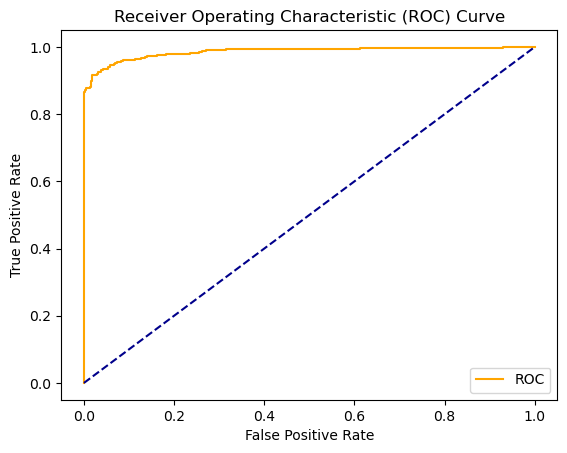

In [211]:
plot_roc_curve(fpr, tpr)

In [212]:
from imblearn.over_sampling import SMOTE

In [213]:
#Checking to see if an oversampling methof (SMOTE) is better for our model. 
smote = SMOTE(random_state = 14)

In [214]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [215]:
print(Counter(y_train_smote))

Counter({0: 213228, 1: 213228})


In [216]:
lr_smote = LogisticRegression()

In [218]:
params_lr_smote = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 3000]}
kfold_lr_smote = KFold(n_splits = 5, shuffle = True, random_state = 14)
lr_smote_cv = GridSearchCV(lr_smote, 
                           params_lr_smote, 
                          scoring = 'roc_auc',
                          cv = kfold_lr_smote,
                            verbose = 1,
                          return_train_score = True)

In [219]:
lr_smote_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=14, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               3000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [220]:
print(lr_smote_cv.best_params_)

{'C': 1000}


In [221]:
print(lr_smote_cv.best_score_)

0.991101687232754


In [222]:
#Initiating our LogisticRegression() model with the best parameters. 
lr_smote_model = LogisticRegression(C = 1000)

In [223]:
lr_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1000)

In [224]:
#Predict and predict_proba on the train (smote) data. 
y_train_smote_pred = lr_smote_model.predict(X_train_smote)

In [225]:
print(confusion_matrix(y_train_smote, y_train_smote_pred))

[[207828   5400]
 [ 15376 197852]]


In [226]:
print(classification_report(y_train_smote, y_train_smote_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    213228
           1       0.97      0.93      0.95    213228

    accuracy                           0.95    426456
   macro avg       0.95      0.95      0.95    426456
weighted avg       0.95      0.95      0.95    426456



In [227]:
#predict_proba on train data. 
y_train_smote_predproba = lr_smote_model.predict_proba(X_train_smote)[:, 1]

In [228]:
print(roc_auc_score(y_train_smote, y_train_smote_predproba))

0.9911149074071726


In [229]:
#Do the same for the test data
y_pred_smote_lr = lr_smote_model.predict(X_test)

In [230]:
print(confusion_matrix(y_test, y_pred_smote_lr))

[[69287  1800]
 [   10   105]]


In [231]:
#predict_proba on test
y_predproba_smote_lr = lr_smote_model.predict_proba(X_test)[:, 1]

In [232]:
print(roc_auc_score(y_test, y_predproba_smote_lr))

0.9781504109171799


In [235]:
#Find the thresholds for the Logistic Regression (SMOTE) model
fpr2, tpr2, thresholds2 = roc_curve(y_train_smote, y_train_smote_predproba)

In [236]:
threshold = thresholds2[np.argmax(tpr2 - fpr2)]

In [237]:
print('Train Roc Score: ', roc_auc_score(y_train_smote, y_train_smote_predproba))
print('Optimal Threshold: ', threshold)

Train Roc Score:  0.9911149074071726
Optimal Threshold:  0.43225322195742666


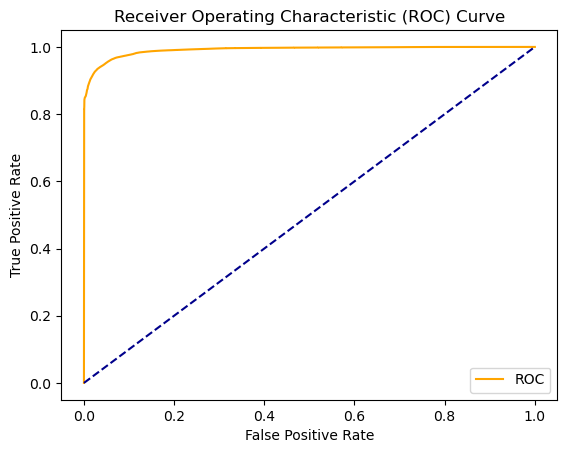

In [239]:
plot_roc_curve(fpr2, tpr2)

In [ ]:
#With the simple Logistic Regression (SMOTE) model the train scores are higher than the undersampling. 